In [38]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
eyesdetector = cv2.CascadeClassifier(r"C:\Users\hp\Desktop\dataset\third-party\frontalEyes35x16.xml")
mostdetector = cv2.CascadeClassifier(r"C:\Users\hp\Desktop\dataset\third-party\Nose18x15.xml")

In [40]:
fullimg=cv2.imread(r"C:\Users\hp\Desktop\test\Before.png")
fullimg=cv2.cvtColor(fullimg,cv2.COLOR_BGR2RGB)

In [41]:
overlay=cv2.imread(r"C:\Users\hp\Desktop\dataset\glasses.png",cv2.IMREAD_UNCHANGED)
overlay=cv2.cvtColor(overlay,cv2.COLOR_BGRA2RGBA)

mostache=cv2.imread(r"C:\Users\hp\Desktop\dataset\mustache.png",-1)
mostache=cv2.cvtColor(mostache,cv2.COLOR_BGRA2RGBA)

In [42]:
nose=mostdetector.detectMultiScale(fullimg,1.3,5)

In [43]:
nose

array([[126, 168,  60,  50]], dtype=int32)

In [44]:
x,y,w,h=nose[0]

mostache=cv2.resize(mostache,(w,h))

for i in range(mostache.shape[0]):
    for j in range(mostache.shape[1]):
        if(mostache[i,j,3]>0):
            fullimg[y+i,x+j,:]=mostache[i,j,:-1]

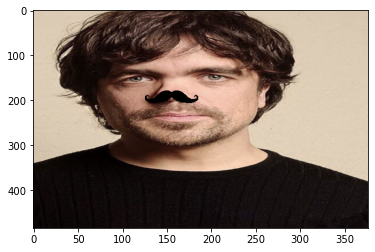

In [45]:
plt.imshow(fullimg,aspect='auto')

In [46]:
eyes=eyesdetector.detectMultiScale(img,1.3,5)

In [47]:
eyes

array([[ 97, 118, 130,  59]], dtype=int32)

In [48]:

x,y,w,h=eyes[0]

overlay=cv2.resize(overlay,(w,h))

for i in range(overlay.shape[0]):
    for j in range(overlay.shape[1]):
        if(overlay[i,j,3]>0):
            fullimg[y+i,x+j,:]=overlay[i,j,:-1]


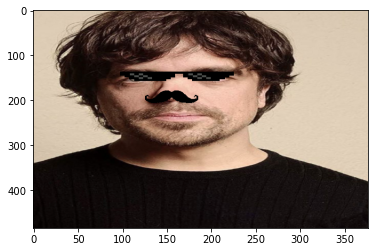

In [49]:
plt.imshow(fullimg,aspect='auto')

In [50]:
fullimg.shape

(485, 377, 3)

In [51]:
fullimg = cv2.cvtColor(fullimg, cv2.COLOR_BGR2RGB)
cv2.imwrite("img.jpg", fullimg)

True

In [52]:
fullimg = fullimg.reshape((-1,3))

In [53]:
fullimg.shape

(182845, 3)

In [19]:
df = pd.DataFrame(fullimg, columns=["Channel 1","Channel 2", "Channel 3"]).to_csv("new_pred.csv", index=False)